In [4]:
import quandl
from functools import reduce
from sklearn.model_selection import train_test_split
import indicators
import pandas as pd

In [2]:
n_bitc = quandl.get("BCHAIN/TOTBC", start_date="2013-01-01")
Transaction_Volume = quandl.get("BCHAIN/ETRAV", start_date="2013-01-01")
n_trans = quandl.get("BCHAIN/NTRAN", start_date="2013-01-01")
usd_ex_trade_vol = quandl.get("BCHAIN/TRVOU", start_date="2013-01-01")
trans_fees = quandl.get("BCHAIN/TRFEE", start_date="2013-01-01")
usd_ex_rate = quandl.get("BCHARTS/BITSTAMPUSD", start_date="2013-01-01")
av_block_size = quandl.get("BCHAIN/AVBLS", start_date="2013-01-01")
blockchain_Size = quandl.get("BCHAIN/BLCHS", start_date="2013-01-01")
hash_rate = quandl.get("BCHAIN/HRATE", start_date="2013-01-01")
miner_revenue = quandl.get("BCHAIN/MIREV", start_date="2013-01-01")

In [70]:
dfs = [n_bitc, Transaction_Volume, n_trans, trans_fees, usd_ex_trade_vol, av_block_size, blockchain_Size, hash_rate, miner_revenue, usd_ex_rate]

df_final = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True,), dfs)
df_final['Y'] = df_final['Close'].shift(-3)

df_final = df_final.ewm(7).mean()
df_final = df_final.dropna()


In [63]:
df_final.columns

Index(['Value_x', 'Value_y', 'Value_x', 'Value_y', 'Value_x', 'Value_y',
       'Value_x', 'Value_y', 'Value', 'Open', 'High', 'Low', 'Close',
       'Volume (BTC)', 'Volume (Currency)', 'Weighted Price', 'Y'],
      dtype='object')

In [157]:
data = df_final.copy()

data['RSI'] = indicators.RSI(data['Close'], 2).astype(float)
data['SO'] = indicators.SO(data['Close'], data['Low'], data['High'], 14).astype(float)
data['Will'] = indicators.Will(data['Close'], data['Low'], data['High'], 14).astype(float)
data['MACD'] = indicators.MACD(data['Close'], 12, 26, 9)
data['PROC'] = indicators.PROC(data['Close'], 2)
data['OBV'] = indicators.OBV(data['Close'], data['Volume (BTC)'], 1)




data = data.dropna()
Y = data['Y'].values
data = data.drop(['Open', 'High', 'Low', 'Weighted Price', 'Y'], axis=1)
X = data.values
data.describe()

,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y,Value_x,Value_y,Value,Close,Volume (BTC),Volume (Currency),RSI,SO,Will,MACD,PROC,OBV
count,1.644000e+03,1644.000000,1644.000000,1644.000000,1.644000e+03,1644.000000,1644.000000,1.644000e+03,1.644000e+03,1644.000000,1644.000000,1.644000e+03,1644.00000,1644.000000,1644.000000,1644.00000,1644.000000,1.644000e+03
mean,1.386311e+07,225679.229058,136873.512448,57.993000,2.313892e+07,0.464564,42923.575822,8.682361e+05,1.572472e+06,503.218099,11838.023934,6.007421e+06,41.00486,60.235688,-39.764312,0.00000,0.006835,8.799403e+05
std,1.759909e+06,82601.117029,85533.000627,79.522479,3.517837e+07,0.291700,33934.460760,1.199251e+06,1.062352e+06,440.815295,7838.507033,7.305146e+06,47.14692,28.809677,28.809677,0.20344,0.028923,5.518496e+05
min,1.062156e+07,72303.650477,36899.573964,10.154368,2.754020e+05,0.095770,4054.420118,2.112635e+01,4.849424e+04,13.163188,1857.566342,2.433573e+04,0.00000,3.041000,-96.959000,-1.00000,-0.234375,-1.257387e+04
25%,1.238233e+07,167012.181639,62061.373347,14.588678,3.618427e+06,0.198302,14023.340554,2.277905e+04,8.804209e+05,234.722926,6373.723316,1.852040e+06,0.00000,28.177250,-71.822750,0.00000,-0.005825,3.890593e+05
50%,1.399738e+07,230657.081735,101124.115374,33.608634,1.080052e+07,0.377178,31072.028426,3.400702e+05,1.368735e+06,416.189311,9716.377015,3.640349e+06,0.00000,71.603000,-28.397000,0.00000,0.002343,9.364682e+05
75%,1.553792e+07,274901.836834,216152.742719,56.890247,2.724364e+07,0.755917,68092.804024,1.382121e+06,2.016569e+06,626.345026,15036.421057,6.878733e+06,100.00000,86.503250,-13.496750,0.00000,0.015649,1.233645e+06
max,1.641493e+07,499285.356422,330375.067666,506.850759,2.428183e+08,0.976237,121887.772403,5.379877e+06,6.132412e+06,2634.372613,45961.326141,5.040644e+07,100.00000,96.702000,-3.298000,1.00000,0.194743,2.242971e+06


In [193]:
train_size = int(len(data) * 0.66)
test_size = int((len(data) - train_size))

trainy, testy = Y[:train_size], Y[train_size:]
trainx, testx = X[:train_size,:], X[train_size:,:]

#check the sizes of arrays
print(len(trainy), len(trainx), len(testx), len(data))

1085 1085 559 1644


In [194]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, max_depth=3, n_jobs=-1, random_state=7)

rf.fit(trainx, trainy)
rf.score(trainx, trainy)

0.98903348042902794

In [195]:
rf.score(testx, testy)

0.059779464053228655

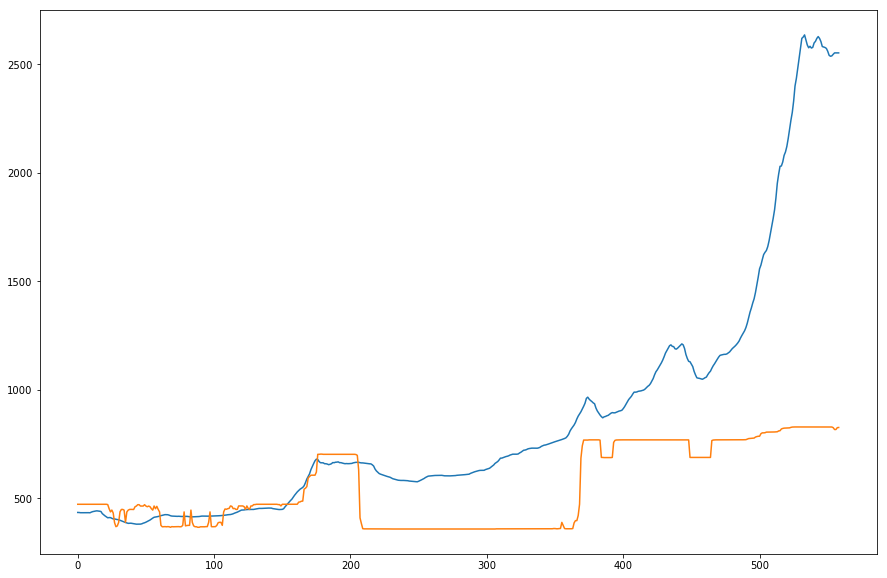

In [196]:
import matplotlib.pyplot as plt
plt.style = 'ggplot'
%matplotlib inline

test_pr = rf.predict(testx)

plt.figure(figsize=(15,10))
plt.plot(testy)
plt.plot(test_pr)

In [169]:
rf.feature_importances_

array([  1.04828172e-02,   2.01282008e-04,   1.32817023e-04,
         1.05151681e-03,   1.52306565e-04,   1.36164604e-04,
         1.06021418e-02,   5.96641777e-03,   1.02739705e-02,
         9.57158574e-01,   1.24093768e-04,   8.82634562e-04,
         2.46445269e-05,   3.80106524e-04,   3.69163084e-04,
         4.03744577e-06,   7.92074734e-04,   1.26523740e-03])